# Homework 7

Unlike previous homework assignments, this homework is **completed as a group** and **submitted on CCLE.** In other words, it's similar to an extended Discussion Activity. 

__Group 24: Ziwei Li, Yilia Zhao, Shiyu Ma__

## Problem 0

It is highly recommended that you work with your group to fully complete the previous Discussion assignments related to the project this week, as all of these are directly helpful for your project submission. 

## Problem 1

In your project, you are required to demonstrate the use of decision trees and multinomial logistic regression classifiers. Groups of three must also demonstrate the use of one additional model. In this homework assignment, you will write a detailed report that will largely fulfill this requirement. 

Choose one machine learning model, other than decision trees and multinomial logistic regression (unless you are a group of 2 -- see below). Some possibilities include, but are not limited to: 

- Support vector classifiers (`sklearn.svm.SVC`). Complexity parameter is called `gamma`. Higher values create more complex models)
- K-nearest-neighbor classifiers (`sklearn.neighbors.KNeighborsClassifier`). Complexity parameter is called `n_neighbors`. Higher values create less complex models. When working with KNN models, it is helpful to standardize your data columns first. For this purpose, `sklearn.preprocessing.StandardScaler` can be used. 
- Multilayer perceptron classifier, a kind of neural network (`sklearn.neural_network.MLPClassifier`). The complexity is controlled by the number of neurons and layers, as specified by the `hidden_layer_sizes` parameter -- more neurons and layers correspond to more complex models. 

You should consult the documentation for these models, which is available online or via `?`. 


#### Groups of 2

If you are a group of 2, you are not required to use an additional model and may instead use multinomial logistic regression for this assignment. Please note this in your submission. 

- Multinomial logistic regression (`sklearn.linear_model.LogisticRegression`). The complexity is controlled by `C`, the inverse regularization strength. Larger values of `C` correspond to more complex models. 

### Instructions

Replicate and expand the pipeline from Discussion 15, substituting out decision trees for your chosen classifier. In particular, you should: 

1. **Load** the data. 
2. **Split the data** into training and test sets. 
3. Write one or more functions to **clean and transform the data** as needed. You should add comments and function docstrings as appropriate to describe to your reader what you are doing and why. Apply your functions to the training and test sets. 
4. **Select 3 columns (features)** from the data. You are required to use at least one qualitative feature (like Island or Sex). We saw one way of doing this "by hand" during a previous Live Lecture, but there are many other approaches as well. You may wish to delegate one group member to do some research on the topic of "feature selection in Python with sklearn". 
4. **Use cross-validation** to estimate optimal model complexity (*Note*: cross-validation is also an acceptable way to perform feature selection -- you may use it above, but you are required to use it here). 
5. Having selected your features and an optimal complexity, **evaluate your model on the test set.** 
6. **Inspect** a few instances in which your trained model gave the wrong answer on the test set. Explain why your model was "tricked" in this case? Create and comment on a confusion matrix. (It might help to look at your lecture notes.)
7. **Plot the decision regions** for your model. These are covered in a recent live lecture, and code required to construct them is below. The horizontal and vertical axes should be the two quantitative predictor variables that you selected. Create a separate plot for each possible value of the qualitative predictor variable that you selected. For example, if you chose `Sex` as your qualitative variable, you should show two plots, with the decision regions for Female and Male penguins separately. Add appropriate axis labels and any other measures required to make your plots look professional. Add commentary to contextualize the mistakes that your model made. 
      
Throughout, add helpful explanation for your reader. For example, you should explain the idea behind cross-validation; anything you are able to learn about how your model works; how to interpret the optimal complexity parameter; and why your model went wrong in certain cases.  

### Additional Specifications

This homework will be graded by me personally, and will be graded using a rubric very similar to that used for the final project. I'll also give you some feedback indicating how you can improve. To get the most benefit out of this feedback, you should **treat this homework as a rehearsal for the full project.** 

Your solution should **not** fit in a single code cell -- a good, readable, and adequately-explained solution will likely require at least one code cell for each of the eight steps above. Make sure that there is plenty of surrounding text explanation and comments. Add code cells and plenty of markdown cells as needed. You can also use section headers with `###` to organize your work. 

Your comments and explanation should be written to an imaginary reader who has never encountered the Palmer Penguins data set before, and knows less about machine learning than you do. Explain your steps. Why train-test split? Why cross-validation? Why decision regions? And so on. If you'd like, imagine that you are writing to a time-traveller version of you from two weeks ago. 

It is not necessary to submit the HW on a copy of this notebook -- you may create and submit a fresh notebook if you wold like. Regardless, 

#### You are required to include a Group Contributions Statement on this HW. 

## Your Solution

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## §1. Loading and Preparing our data

Starting with loading the penguin data, we changed the Species name to only get the first word of the species so that our data is easier to read.

In this case, we get __Adelie, Chinstrap__, and __Gentoo__ for all the penguin species.
Here are some example data:

In [51]:
##1
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

#shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)
penguins.head(10)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
8,PAL0708,9,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/9/07,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,11/9/07,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.


For our Machine Learning Model, we first need to split our penguins data into __training__ and __test sets__. Here we get 80% of the data to be our training data set that will be useful for our model training and the remaining 20% to be the testing data set.

In [52]:
##2.
train,test=train_test_split(penguins,test_size=.2)
train.shape,test.shape

((275, 17), (69, 17))

Next, in order to predict the species of the penguins given our datasets, we need to split the data into the ___"predictor"___ and ___"target"___ variables.

For data cleaning and other preparation, we wrote a function `prep_penguins_data` to drop several columns of data that we have considered to be not helpful to our training indicated in our previous Exploratory Analysis. Also, we drop the rows with missing information to prevent running in any issues with our data.


In [53]:
##3.
def prep_penguins_data(data_df):
    df = data_df.copy()
    df=df.drop(["studyName","Sample Number","Individual ID","Comments",
                "Region","Stage","Date Egg","Clutch Completion"],axis=1)
    df=df.dropna()
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Species']=le.fit_transform(df['Species'])
    df['Island']=le.fit_transform(df['Island'])
    
    X = df.drop(["Species"], axis = 1)
    y = df["Species"]
        
    return(X, y)

X_train, y_train = prep_penguins_data(train)
X_test,  y_test  = prep_penguins_data(test)

## §2. ML Modeling

In this section, we will use 1. 2. and 3.K-Nearest-Neighbor Classifiers as our models for data analysis.

### Model 3: K-Nearest-Neighbor Classifiers

For our third model, we will use K-Nearest-Neighbor model. The KNN model measures the similarity or proximity of data by calculating the distance between different points in the dataset. 

To find the optimal complexity parameter `n_neightbors` that will be used in our KNN model, we also employed the ___cross-validation___ method below. 

0.7769230769230768 1


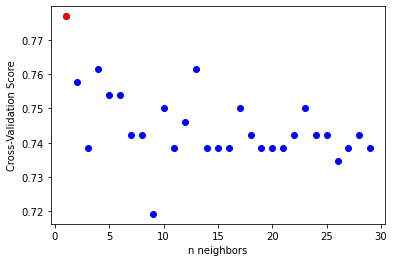

In [54]:
# Plot to visualize the cross validation scores over model complexity
from sklearn.neighbors import KNeighborsClassifier

fig, ax = plt.subplots(1) 
ax.set(xlabel = "n neighbors", ylabel = "Cross-Validation Score")

# initialize the best score and parameter to 0 
best_score, best_para = 0, 0 

# loop through different complexity parameter n_neighbors
for d in range(1, 30):
    KNN = KNeighborsClassifier(n_neighbors = d) # initialize the KNN Model
    # compute mean of cv score
    cv_score = cross_val_score(KNN, X_train, y_train, cv = 5).mean() 
    ax.scatter(d, cv_score, color = "blue") # plot this point on the graph
    
    
    # if the current cv score is greater than best_score, update best_score
    if cv_score > best_score:
        best_para = d
        best_score = cv_score
        
ax.scatter(best_para, best_score, color = "red")
print(best_score, best_para)


By looking at the graph as well as our result for the optimal, here we get `n_neighbor` = 1 to be the best complexity parameter. We then set our KNN model using this information.

Since we have not yet determine the most relevant columns for predicting the species, we got a cross-validation score of around 0.78. We will then continue improving our model by using feature selection.

In [55]:
model=KNeighborsClassifier(n_neighbors = best_para)

Above is our current model with the best complexity parameter.

### Feature Selection

In our previous Exploratory Analysis, we have discovered a few columns that might be useful in predicting the species of the penguins. Here we put the potential columns such as Culmen Length (mm), Culmen Depth (mm), Sex, Island, Body Mass (g) in different combinations with each other into a list called combos.

We will then use __cross-validation__ to find the best combination of the columns that has the highest cross-validation score.

In [56]:
##4.
def check_column_score(cols):
    """
    Trains and evaluates the model via crossvalidation on the columns
    of the dataset with select indices
    """
    print("training with columns"+str(cols))

    return cross_val_score(model,X_train[cols],y_train,cv=5).mean()

combos = [['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'],
          ['Sex', 'Culmen Length (mm)', 'Body Mass (g)'],
          ['Island', 'Body Mass (g)','Culmen Length (mm)'],
          ['Island', 'Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Sex', 'Island', 'Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)']]

for combo in combos:
    x=check_column_score(combo)
    print("CV score is "+str(np.round(x,3)))

training with columns['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']
CV score is 0.965
training with columns['Sex', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is 0.777
training with columns['Island', 'Body Mass (g)', 'Culmen Length (mm)']
CV score is 0.785
training with columns['Island', 'Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.804
training with columns['Sex', 'Island', 'Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.804


From the results shown above, we therefore can choose our features as columns 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex' since it has the highest cross-validation score.

Since the Cross-Validation applies unseen data to the model, it could accurately and fairly evaluate the performance of the model. By using __K-fold Cross-Validation__, we repeatly assign different data into our test set to evaluate our model and get the mean CV score 0.965.

### Evaluate Model on the Test Data

In [57]:
##6.
model.fit(X_train[combos[0]],y_train)
model.score(X_test[combos[0]],y_test)

0.9384615384615385

By evaluating our model against the unseen testing data, we gain an accuracy of 0.94, which is a fairly good result. It is slightly lower than the cv score but the difference is not super huge. Therefore, there might be no overfitting in our model.

### Inspecting the Errors

Next, we will inspect some of the wrong predictions of the testing data results by using a __confusion matrix__.

In [59]:
##7.
y_test_pred=model.predict(X_test[combos[0]]) 

from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_test_pred)
c

array([[28,  0,  0],
       [ 2, 12,  2],
       [ 0,  0, 21]], dtype=int64)

The `i,j`th entry of the confusion matrix array above gives the number of times that the model predicted specie `j` when the true specie was actually `i`. 

Thus each row of the array represents the actual Species of penguins, where row 1 is an Adelie, 2 is a Chinstrap, and 3 is a Gentoo. Each columns represents the predicted Species of penguins, where columns 1, 2, 3 indicates Species with the same order above.

From the confusion matrix, we could see that large numbers are on the diagonal and this indicates the model is usually right. However, the [1,0]th entry and the [1,2]th entry is 2. These two numbers correspond to the false predictions shown above: 2 specie-1 penguins(Chinstrap) were falsely predicted as specie-0 penguins(Adelie), and 2 specie-1 penguins(Chinstrap) were falsely predicted as specie-2 penguins(Gentoo).

Let's take a look at some of these cases using Boolean indexing: 

In [60]:
mask=y_test!=y_test_pred #filter all wrong predictions

#wrong result's predictor
mistakes=X_test[mask][["Culmen Length (mm)","Culmen Depth (mm)","Sex"]]  

mistake_preds=y_test_pred[mask] #wrong result
true_specie=y_test[mask] #actural result

mistake_preds,true_specie #print wrong result vs actural result

(array([2, 0, 0, 2]),
 166    1
 216    1
 160    1
 213    1
 Name: Species, dtype: int32)

Here we can see the specific entries that were falsely predicted. Let's reframe the data in a clearer table to figure out why our model was "tricked".

In [66]:
mistake_df=pd.DataFrame({"True Species":true_specie,"Wrong Prediction":mistake_preds})
mistake_table=pd.concat((mistake_df,mistakes),axis=1)
decode={0:'Adelie',1:'Chinstrap',2:'Gentoo'}
decode1={0:'Unknown',1:'FEMALE',2:'MALE'}
mistake_table["True Species"]=mistake_table["True Species"].map(decode)
mistake_table["Wrong Prediction"]=mistake_table["Wrong Prediction"].map(decode)
mistake_table["Sex"]=mistake_table["Sex"].map(decode1)
mistake_table

,True Species,Wrong Prediction,Culmen Length (mm),Culmen Depth (mm),Sex
166,Chinstrap,Gentoo,45.9,17.1,FEMALE
216,Chinstrap,Adelie,43.5,18.1,FEMALE
160,Chinstrap,Adelie,46.0,18.9,FEMALE
213,Chinstrap,Gentoo,46.8,16.5,FEMALE


Now let's see the variable means of the three species. 

In [64]:
train.groupby(["Species","Sex"])[["Culmen Length (mm)","Culmen Depth (mm)"]].mean()

Culmen Length (mm)  Culmen Depth (mm)
Species   Sex                                          
Adelie    FEMALE           37.437037          17.601852
          MALE             40.411290          19.072581
Chinstrap FEMALE           46.532000          17.520000
          MALE             50.748148          19.207407
Gentoo    FEMALE           45.568627          14.231373
          MALE             49.493750          15.702083

Compare the variable values of the falsely predicted data with the variable means above, we can see that some penguins have values of Culmen Length, Culmen Depth that are similar to those of other species. 

For example, penguin 166 is a female Chinstrap penguin. However, it has Culmen Length of 45.9, which is closer to 45.47 (female Gentoo penguins) rather than 46.53 of the female Chinstrap penguins. In this case, our model falsely predicted its specie. 

### Decision Region Plotting

Now let's show our model's predicting results in graphs. We wrote a `plot_regions` function below to show the decision regions.

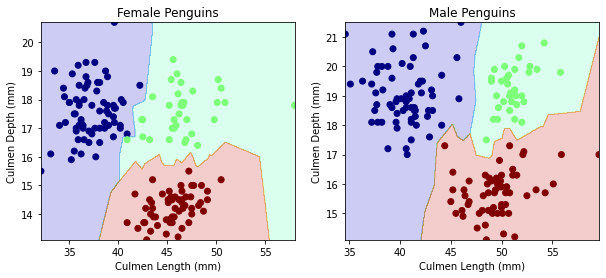

In [67]:
def plot_regions(c,X,y):
    """
    Plot the decision regions of a classifer
    c: the classifier
    X: the data frame with all three columns of predictor variables (sex, culmen 
    length, culment depth)
    y: the target variable which contains the column "Species"
    
    Outputs
    -------
    Does not return any values.
    plot the decision regions of the machine learning model on the two sex groups
    
    """
    
    #create an empty plot with two subplots
    fig, ax = plt.subplots(1,2,figsize=(10,4))

    #separate X and y into two sex groups: "_f" represents the female group; 
    #"_m" represents the male group
    mask_f=X["Sex"]==1
    X_f=X[mask_f]
    y_f=y[mask_f]
    mask_m=X["Sex"]==2
    X_m=X[mask_m]
    y_m=y[mask_m]

    #recode labels 
    le = preprocessing.LabelEncoder()        
    y_f= le.fit_transform(y_f)
    y_m= le.fit_transform(y_m)
    
    x0_f=X_f['Culmen Length (mm)']
    x1_f=X_f['Culmen Depth (mm)']
    x0_m=X_m['Culmen Length (mm)']
    x1_m=X_m['Culmen Depth (mm)']
    
    #create two grids for two sexes
    grid_x_f=np.linspace(x0_f.min(),x0_f.max(),501)
    grid_y_f=np.linspace(x1_f.min(),x1_f.max(),501)
    xx_f,yy_f=np.meshgrid(grid_x_f,grid_y_f) #has 501x501
    grid_x_m=np.linspace(x0_m.min(),x0_m.max(),501)
    grid_y_m=np.linspace(x1_m.min(),x1_m.max(),501)
    xx_m,yy_m=np.meshgrid(grid_x_m,grid_y_m)
    
    #make the sex column either zeros or ones
    male = np.zeros(251001)
    female = np.ones(251001)
    
    ##this part is for famale penguins
    #fit the female model
    c.fit(X_f,y_f)
    #convert columns to 1d arrays
    XX_f=xx_f.ravel()
    YY_f=yy_f.ravel()
    #use model to make predictions
    p_f=c.predict(np.c_[XX_f,YY_f,female])    
    #reshape the prediction to a 2d array
    p_f=p_f.reshape(xx_f.shape)
    #plot the decision regions for female penguins, color-coded by species
    ax[0].contourf(xx_f,yy_f,p_f,cmap="jet",alpha=.2)
    #plot the scatter plot for female penguins
    ax[0].scatter(x0_f,x1_f,c=y_f,cmap="jet")
    
    ##this part is for male penguins, similar to the code above
    c.fit(X_m,y_m)
    XX_m=xx_m.ravel()
    YY_m=yy_m.ravel()
    p_m=c.predict(np.c_[XX_m,YY_m,male])
    p_m=p_m.reshape(xx_m.shape)
    ax[1].contourf(xx_m,yy_m,p_m,cmap="jet",alpha=.2)
    ax[1].scatter(x0_m,x1_m,c=y_m,cmap="jet")
    
    #set labels to the plots
    ax[0].set(xlabel = "Culmen Length (mm)",
           ylabel = "Culmen Depth (mm)",
           title = "Female Penguins")
    ax[1].set(xlabel = "Culmen Length (mm)",
           ylabel = "Culmen Depth (mm)",
           title = "Male Penguins")

#split the original penguins dataset into:
#X(predictor variables with all columns) and y(target variable with "Species")
X,y=prep_penguins_data(penguins)
#modify X to contain selected three predictor variables
X=X[combos[0]]

plot_regions(model,X,y)

By observing the two graphs above, we could tell that our model has a high accuracy that it has successfully predicted the species of most penguins.

In addition, we observed there is an apparent difference between female and male penguins: female penguins generally have smaller culmen depths and culmen lengths than male penguins. Also, ___culmen depth___ and ___culmen length___ are both good predictors for species, as we could tell from the clear borders between different color blocks.

## Contribution Statement

In this assignment, we worked together to figure out the right model to do the machine learning of penguins dataset. Ziwei made a great contribution in clearing the raw data, and spliting the data into training and test sets. Then, we worked collaboratively to determine the prospective feature combinations and found out the best combo by using cross-validation. Shiyu constructed a function which uses cross-validation to estimate optimal model complexity, and estimated the model accuracy based on our selected columns and model complexity. Yilia accomplished most of the decision region plotting function, and interpreted meanings of the graphs. Finally, we worked together to finish the docstrings and comments of our codes, and we modified our assignment into a well-organized notebook as well.